# 상관 분석
- 두 연속형 번수 사이 상관관계가 존재하는지를 파악하고, 상관관계의 정도를 확인하는 것이 상관분석(Correlation analysis)입니다.
<br><br>
- 상관분석에서는 관련성을 파악하는 지표로 상관계수(Correlation coefficient)라는 통계학 관점의 선형적 상관도를 확인하여 관련성을 파악합니다.
<br><br><br><br>
- 상관분석 단계는 다음과 같습니다.
1. 산점도(Scatter)로 두 변수 상관 파악
1. 상관계수 확인
1. 의사결정

- 산점도를 상관계수로 설명하면 다음과 같습니다.
|상관|상관계수|
|:---:|:---:|
|음의 상관|-1.0 ~ -0.7이면, 강한 음의 상관관계 / -0.7 ~ -0.3이면, 뚜렷한 음의 상관관계 / -0.3 ~ -0.1이면, 약한 음의 상관관계|
|무상관|-0.1 ~ + 0.1이면, 없다고 할 수 있는 상관관계|
|양의 상관|+0.1 ~ +0.3이면, 약한 양의 상관관계 / +0.7 ~ +0.3이면, 뚜렷한 양의 상관관계 / +0.7 + 0.1이면, 강한 양의 상관관계|

- 상관 분석의 주의점
>- 연속형(숫자로 표현 가능한) 데이터에 대해서만 상관관계 분석이 가능합니다.<br><br>
>- -1부터 1까지의 값으로 상관관계의 크기를 나타냅니다.<br><br>
>- 증가하는 방향성에 대한 것인지, 인과관계를 의미하지는 않습니다. 상관계수는 인과관계를 의미하는 것이 아니라 단지 연관성만을 의미합니다.<br><br>
>- 연속형 변수 X와 Y의 상관 정도만 표기 합니다. (Y=X)<br><br>
<br><br>
- 각 변수간의(열 간의) 상관관계를 보려면 corr() 함수

In [3]:
# 판다스 라이브러리 불러오기
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

# 데이터 불러오기
file_path = "C:/Users/BurgerC/파이썬으로 경험하는 빅데이터 머신러닝/data/exam_sample_cor.csv"

# read_csv() 함수로 데이터프레임 변환
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


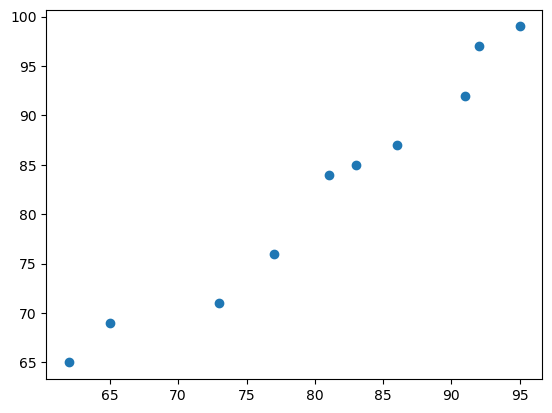

In [4]:
# 두 연속형 변수 스캐터플롯 그리기
plt.scatter(df.science, df.math)

In [5]:
# 상관계수 확인
corr = df.corr() #(method = 'pearson')
corr

,student_no,science,english,math
student_no,1.000000,0.334156,0.180978,0.264716
science,0.334156,1.000000,0.976411,0.982180
english,0.180978,0.976411,1.000000,0.984986
math,0.264716,0.982180,0.984986,1.000000


<AxesSubplot:>

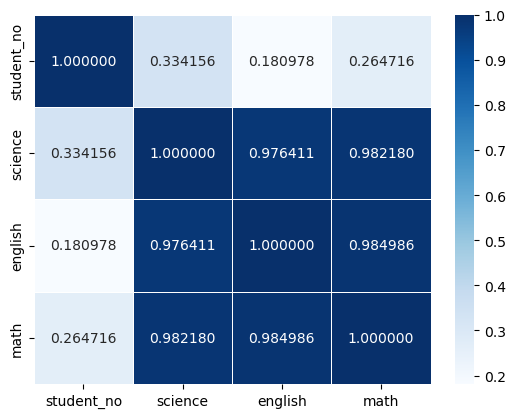

In [6]:
# 히트맵으로 상관도 시각화
sns.heatmap(data = df.corr(), annot=True, fmt = '2f', linewidths=.5, cmap='Blues')

C:\Users\BurgerC\AppData\Local\Temp\ipykernel_11068\940445595.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df1, dtype=np.bool)


<AxesSubplot:>

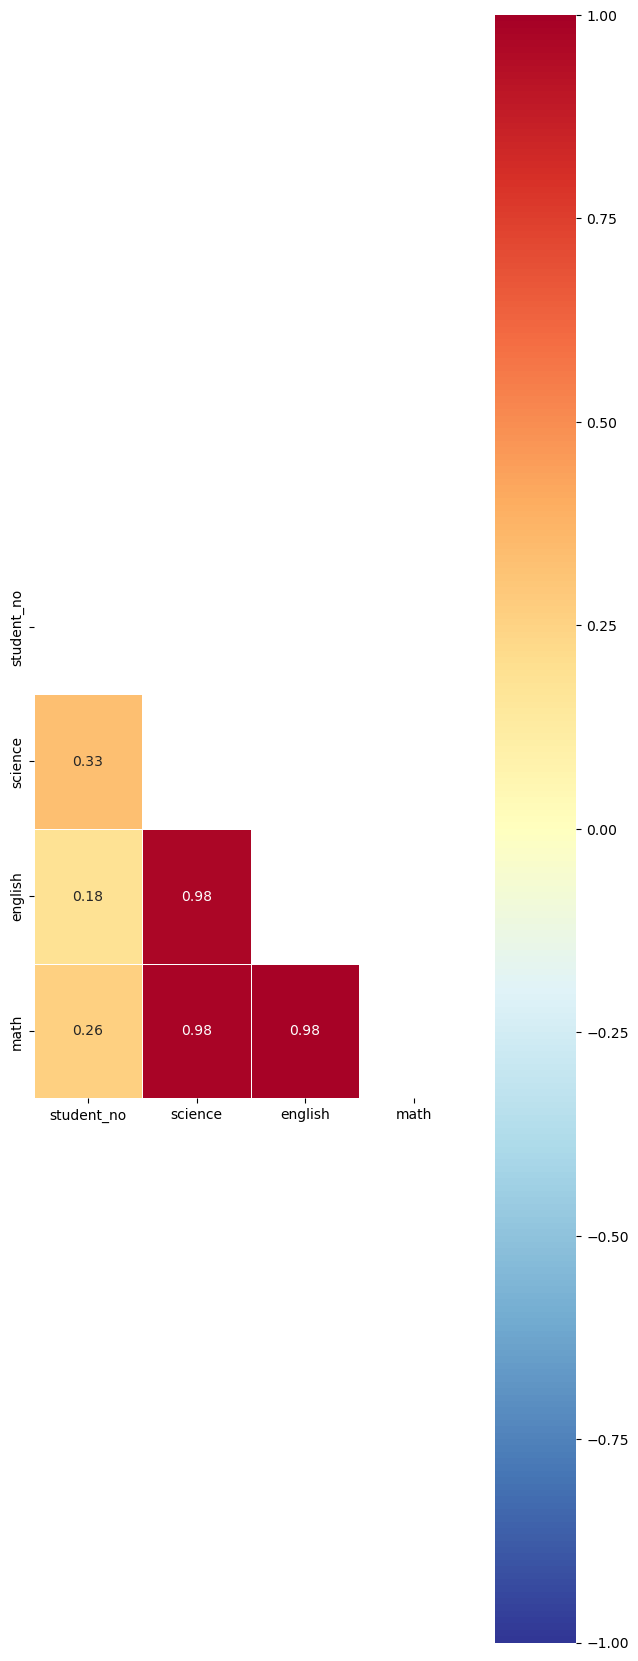

In [11]:
df1 = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(7,7))

# 삼각형 마스크를 작성합니다. (위 삼각형 True, 아래 삼각형 False)
mask = np.zeros_like(df1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(df1, cmap= 'RdYlBu_r',
           annot = True,  # 실제 값을 표시한다
           mask = mask,  # 표시하지 않을 마스크 부분을 지정한다
           linewidth=.5,  # 경계면 실선으로 구분하기
           cbar_kws={"shrink" : 5},  # 컬러바 크기 절반으로 줄이기
           vmin = -1, vmax = 1  # 컬러바 범위
           )

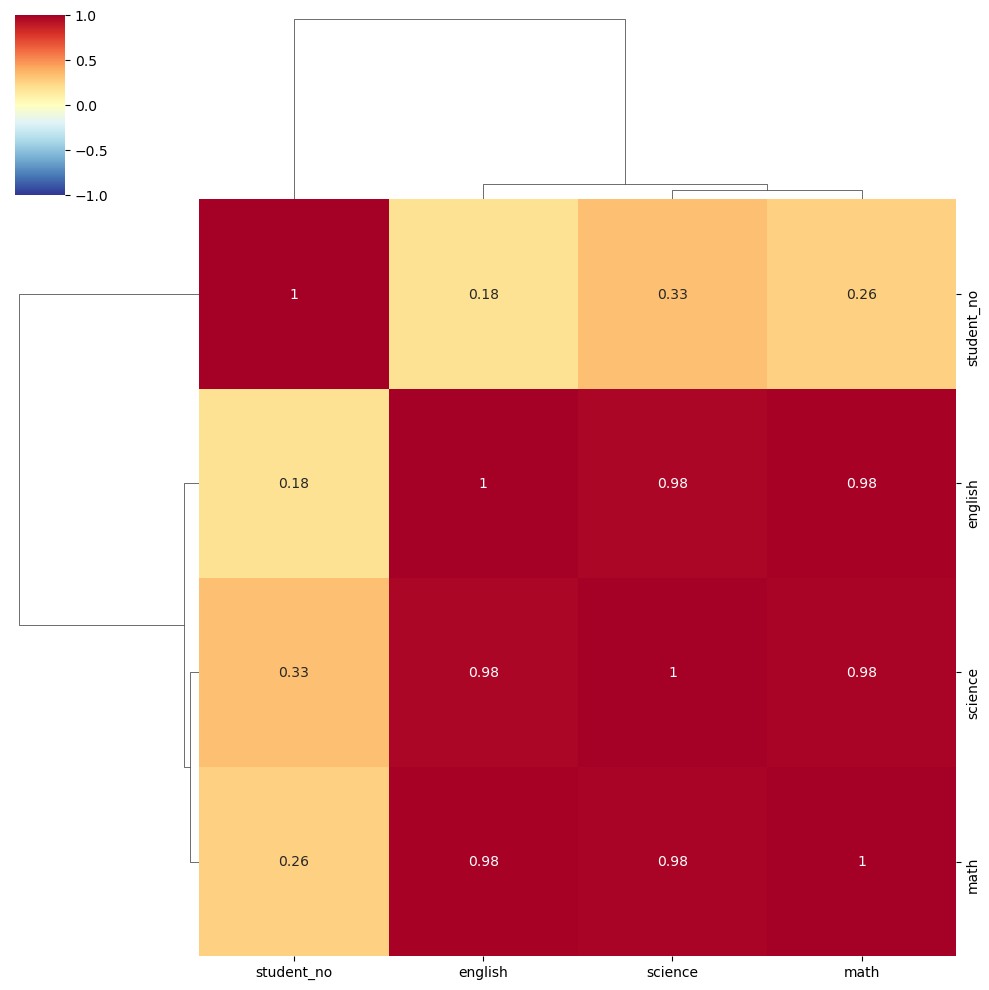

In [12]:
df1 = df.corr()
sns.clustermap(df1, annot = True,  # 실제 값 화면에 나타내기
              cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
              vmin = -1, vmax = 1  # 컬러차트 -1 ~ 1 범위로 표시
              )

# 회귀 분석
- 독립, 종속변수
|X|Y|
|:---:|:---:|
|독립변수, 설명변수, 원인변수|종속변수, 반응변수, 결과변수 머신러닝(클래스, 라벨)|
|다른 변수에 영향을 주는 원인|다른 변수에 영향을 받는 결과|
|Dependent Variable Response|Independent Variable, Predictor Factor|

<br><br>
- 회귀분석이 머신러닝의 기본이 되는 이유는 회귀분석의 학습 방법이 머신러닝 학습 방법 중 '지도학습' 문제에 사용할 수 있는 알고리즘이기 때문
<br><br>
- 예측 문제란 기존 데이터를 기반으로 생성된 모델(여기서는 회귀식 또는 회귀모델)을 이용하여 새로운 데이터가 들어왔을 때 어떤 '값'이 될지 예상하는 문제
<br><br>
- 변수에서 입력하는 변수를 X,, 변수 X에 의해서 값이 종속적으로 정해지는 변수를 Y라고 한다면
>- 기본 회귀식 : Y = X
<br><br>
- 회귀식은 종속변수가 연속형, 범주형에 따라서 선형회귀분석과 로지스틱 회귀분석으로 구분

## 선형회귀분석
- 선형회귀분석(Linear Regression Analysis)은 쌍으로 관찰된 연속형 변수들 사이의 관계에 있어서 한 변수를 원인으로 하고 다른 변수들을 결과로 하는 분석
<br><br>
- 즉, 독립변수와 종속변수 사이 선형식을 구하고 그 식을 이용하여 변수값들이 주어졌을 때 종속변수의 변수 값을 예측하는 분석방법
<br><br>
- 선형회귀분석은 다시 독립변수의 개수에 따라 단순 선형과 다중 선형으로 구분
<br><br>
    

### 단순 선형 회귀 분석(Simple Linear Regression Analysis)
<br><br>
>- 단순 선형 회귀분석은 주어진 데이터를 대표하는 하나의 직선을 찾는 것인데, 이 직선을 회귀선이라고 부르고 이 선을 함수로 표현한 것을 회귀식이라고 함
<br><br>
>- 단순 선형 회귀분석은 x변수와 y변수 간의 관계를 y = ax+b와 같은 하나의 선현 관계식으로 표현
<br><br>
>- 이때 y = ax + b인 회귀식에서 독립변수가 x가 하나인 것이기에 단순선형회귀분석이라고 함
<br><br>
>- 최소제곱법을 이해하기 위해서는 '잔차'라는 개념을 알아야 함. 
<br><br>
>- 잔차란 실제값의 y와 예측값의 y간의 차이를 뜻함
<br><br>
>- 최소 제곱법은 잔차의 제곱의 합이 최소가 되도록 하는 직선을 회귀선으로 한다는 것을 의미함
<br><br>
>- 또 직선 변경하며 잔차의 제곱의 합이 최소가 되게 하는 직선을 찾는 방법이 바로 선형 회귀분석이라고 함
<br><br>
>- 이 직선을 회귀선이라고 부르며 그 선의 함수를 회귀식 이라고 함.
<br><br><br><br>

### 선형 회귀모형

#### 회귀분석
- 실습에서는 과학 점수를 통해 수학 점수를 예측하는 선형 회귀모형을 만들고 평가해보겠습니다.
<br><br>
- 전처리를 마쳤다면 보통 회귀분석 단계는 다음과 같이 진행합니다.<br><br>
    - 상관분석
    - 변수정의(종속 = 독립)
    - 회귀모형(회귀방정식)
    - 모델 평가

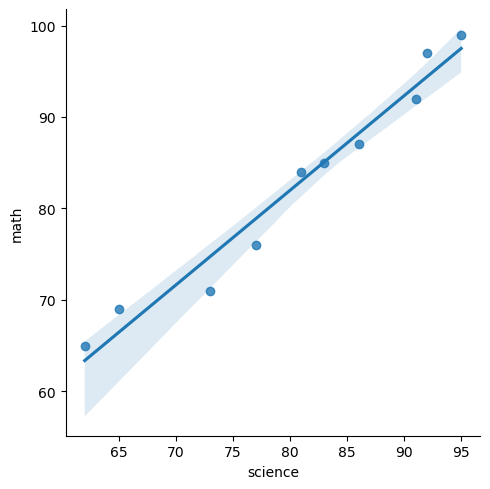

In [14]:
# 시본으로 과학 수학 점수를 상관분석 해봅니다.
sns.lmplot(x='science', y='math', data=df)

In [16]:
# 회귀분석을 위해 종쇽(Y=수학), 독립(X=과학)하는 모델을 만듭니다.
# 과학점수를 알면 수학점수를 예상 할 수 있습니다.
# 단순선형회귀 모형 
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("math ~ science", df).fit()
lin_reg.summary()

C:\Users\BurgerC\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     218.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           4.32e-07
Time:                        14:26:23   Log-Likelihood:                -21.673
No. Observations:                  10   AIC:                             47.35
Df Residuals:                       8   BIC:                             47.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7527      5.682     -0.132      0.898     -13.855      12.349
science        1.0342      0.070     14.781      0.000       0.873       1.196
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.811
Skew:                          -0.402   Prob(JB):                        0.667
Kurtosis:                       1.859   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 회귀분석평가
- 회귀분석은 간단한 모델과 함께 많은 정보를 제공합니다.
<br><br>
1. R-squared(R제곱)
>- R-squared(R제곱) 값이 0.965입니다. 
<br><br>
>- R-Squared는 앞서 회귀분석을 실시한 "수학 = a * 과학 + b " 모델이 얼마나 잘 설명해주는지 모델식의 적합성을 의미합니다.
<br><br>
>- 여기서는 선형 회귀분석 모델이 수학 변동성의 96.5%를 설명한다는 의미입니다.
<br><br>
>- R-squared는 0~1의 값을 가지고 0이면 모델의 설명령이 전혀 없는 상태, 1이면 모델이 완벽하게 데이터를 설명하는 상태입니다.
<br><br>
1. 회귀모형
>- coef(coefficient, 계수)를 살펴보면, intercept는 -0.7527, 과학은 1.0342입니다.
<br><br>
>- 이 계수값을 선형 회귀분석 모델에 대입하면 '수학 = 1.0342 * 과학 - 0.7527'의 예측 모형식을 만들 수 있습니다.
<br><br>
1. P>|t|(유의확률)
>- P>|t|(유의확률)은 독립변수의 유의확률이며 보통 독립변수가 95%의 신뢰도를 가져야 유의미하다고 판단합니다.
<br><br>
>- 이 경우 독립변수의 유의 확률은 0.05보다 작은 값이 산출되었습니다.
<br><br>
>- 즉, 독립변수의 유의확률이 0.05보다 작으면, 독립변수가 종속변수에 영향을 미치는 것이 유의미하다고 보는데 과학의 유의확률은 0입니다.
<br><br>
>- 따라서 과학점수는 수학 점수에 유의미하게 영향을 미친다고 할 수 있습니다.<br><br>
1. Durbin-Watson 검정
>- Durbin-Watson(더빈왓슨, DW검정)의 값은 2.261입니다.
<br><br>
>- DW 검정은 잔차의 독립성을 확인할 수 있는 수치입니다.
<br><br>
>- 0이면 잔차들이 양의 자기상관을 갖고, 2이면 자기상관이 없는 독립성을 갖고, 4이면 잔차들이 음의 자기상관을 갖는다고 해석합니다.
<br><br>
>- 일반적으로 1.5~2.5 사이이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미합니다.
<br><br>
>- DW검정값이 0 또는 4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미이고, 이는 t값. F값, R제곱을 실제보다 증가시켜 실제로 유의미하지 않는 결과를 유의미한 결과로 왜곡하게 됩니다.<br><br>
1. No.obervations는 10입니다. 즉 10개의 데이터 쌍을 가지고 회귀분석을 실시하였다는 의미입니다.
<br><br>
1. Df Model은 1입니다. Df Model은 회귀분석의 "예측변수의 숫자(k)"를 의미합니다. 회귀분석의 전체 파라미터는 1개의 종속변수를 포함하므로 Df Model은 다른 식으로는 "회귀분석 전체 파라미터 숫자 - 1"입니다. 회귀모형에서 예측변수는 "과학" 1개이므로 Df Model은 1이 됩니다.<br><br>
1. Df Residuals는 8입니다. Df Residuals는 "No.observations - (Df Model + 1)"로 생성합니다. 전체 관찰데이터의 수에서 회귀모형의 파라미터의 수를 뺀 값이며 여기 모형에서는 10 - 2 = 8로 산출됩니다.

### 다중 선형 회귀 분석(Multiple Linear Regression Analysis)
- 단순 선형 회귀분석이 독립변수 X가 1개, 종속변수 Y가 1개인 선형 회귀분석이라면, 다중 선형 회귀분석은 독립변수 X가 2개 이상으로 확장되고, 종속변수Y가 1개인 회귀분석입니다.
<br><br>
- 다중 선형 회귀분석은 아래와 같은 회귀식을 갖습니다.
>- y = ax1 + bx2 + ... + c
<br><br>
- 다중 선형 회귀분석에서도 최소제곱법을 이용하여 각 설명변수 x의 가중치 역할을 하는 회귀계수(a, b, ..)와 Y절편(c)을 구하게 됩니다.

## 로지스틱 회귀분석과 가중치
- 선형회귀에서 수학과 과학 성적 간의 관계를 직선의 방정식으로 표현한다는 가설 하에, 주어진 데이터로부터 가중치 a(weight)와 편항 b(bias)를 찾아 데이터를 가장 잘 표현하는 직선을 찾았습니다.
<br><br>
- 종속변수가 연속값이 아니라 비연속값이면 선형회귀분석을 사용할 수 없습니다.
<br><br>
- 이럴 경우 로지스틱회귀분석(logistic regression analysis)을 사용해야 합니다.

In [17]:
import pandas as pd  # 판다스
import seaborn as sns  # 시본
import numpy as np  # 넘파이

# DataFrame 생성
passtest = [0,0,0,0,0,1,1,1,1,1]
score = [51, 64, 60, 50, 68, 80, 90, 92, 99, 83]
df = pd.DataFrame({"passtest" : passtest, "score": score})
df.head()

,passtest,score
0,0,51
1,0,64
2,0,60
3,0,50
4,0,68


C:\Users\BurgerC\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


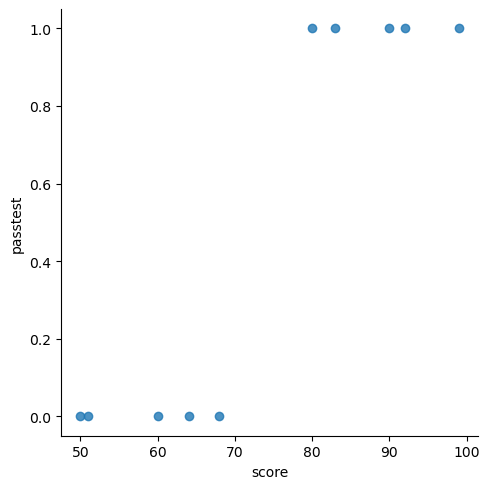

In [18]:
# 상관분석
sns.lmplot(x='score', y='passtest', data=df, logistic=True)

- 이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현됩니다.
<br><br>
- x와 y의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현할 수 있는 곡선 함수가 필요합니다.
<br><br>
- 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환하며 S자와 유사한 모양을 출력합니다.

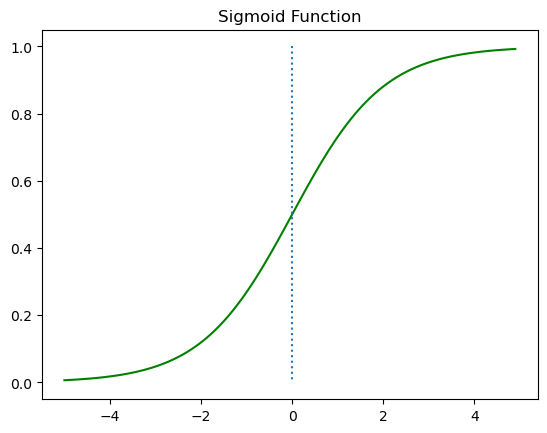

In [19]:
#  y=ax+b 에서 a는 1, b는 0임을 가정한 그래프입니다.
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

1. 가중치 a의 변화 확인
>- 그래프는 a의 값이 0.5일때 빨간색 선, a의 값이 1일때는 초록색 선, a 값이 2일 때 파란색 선이 나오도록 하였습니다. 
<br><br>
>- 선형 회귀에서 가중치 a는 직선의 기울기를 의미했지만, 여기서는 그래프의 경사도를 결정합니다.
<br><br>
>- a의 값이 커지면 경사가 커지고 a의 값이 작아지면 경사가 작아집니다.

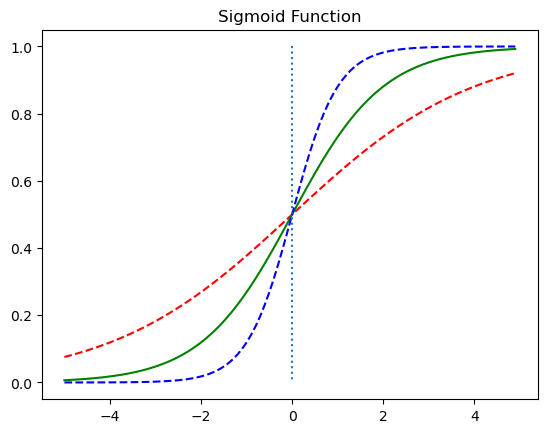

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

2. 편항 b의 변화 확인
>- 편항 b의 값에 따라서 그래프가 이동하는 것을 확인합니다.

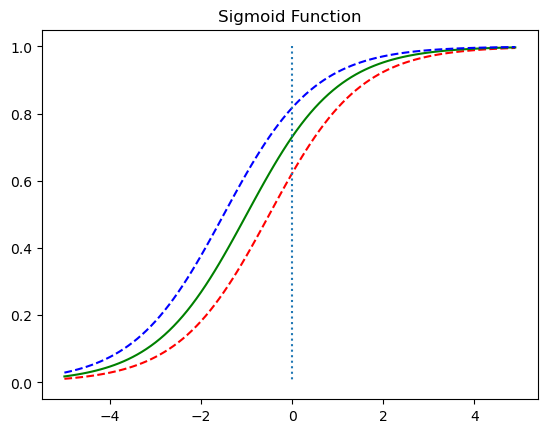

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--')  # x + 0.5
plt.plot(x, y2, 'g')  # x + 1
plt.plot(x, y3, 'b', linestyle='--')  # x + 1.5
plt.plot([0,0],[1.0,0.0], ":")  #  가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

- 시그모이드 함수는 입력값이 커지면 1에 수렴하고, 입력값이 작아지면 0으로 수렴합니다.
<br><br>
- 0부터 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제로 사용할 수 있습니다.
<br><br>
- 이를 확률이라고 생각하면 해당 범주에 속할 확률이 50%가 넘으면, 해당 범주라고 판단하고 50%보다 낮으면 아니라고 판단할 수 있습니다.
<br><br>
- 다시 살펴보겠지만 시그모이드 함수는 머신러닝에서 대표적인 활성화함수로도 사용됩니다.

# 머신러닝 넘어가기

## 머신러닝 모델 최적화
- 선형회귀식에서 최소제곱법으로 일차 함수(y=ax+b)의 기울기 a와 y절편 b를 구할 수 있습니다.
<br><br>
- 이를 바탕으로 평균제곱오차를 찾아보겠습니다.

### 평균제곱오차
- 선형회귀식에서 머신러닝으로 넘어가면서 실제값과 예측값 차이인 잔차(residual)를 오차(error)라고 했습니다.
<br><br>
- 여기서 오차들만 따로 모아 오차의 합 평균을 구할 수 있는데 이를 평균제곱오차(Mean Squared Error, MSE)라고 합니다.<br><br>
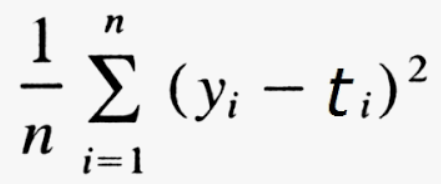


- 때로는 평균 제곱 오차가 너무 커서 쓰기가 불편합니다.
<br><br>
- 이럴 때 다시 제곱근을 사용하는데 이것을 평균 제곱근 오차(Root Mean Squared Error, RMSE)라고 합니다.
<br><br>

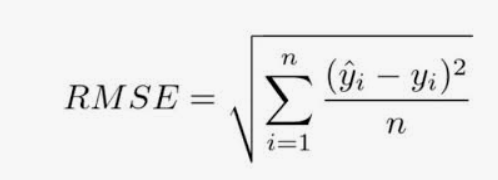

### 비용함수/손실함수/목적함수/오차함수
- 선형회귀식에서 평균제곱오차는 머신러닝 모델을 구축할 때 작을 수록 원본과의 오차가 적은 것이므로 추측한 값의 정확성이 높다고 할 수 있습니다.
<br><br>
- 이때 오차 값을 추적하는 함수라는 의미에서 오차함수(error function)라고 합니다.
<br><br>
- 또 함수값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수라는 뜻에서 목적함수(Objective function), 비용과 손실을 최소화 한다는 의미에서 비용 함수(Cost function) 또는 손실함수(Loss function)이라고 합니다.

### 최적화
- 머신러닝에서 가장 중요한 해결 목표는 비용 함수의 값을 최대한 작게 하는 가중치, 편향등 매개변수(하이퍼파라미터)를 찾는 일입니다.
<br><br>
- 또 매개변수의 최적값을 찾는 문제를 해결하는 과정을 최적화라고 합니다.
<br><br>
- 아래 선형식에서 적절한 a와 b를 찾아내는 과정을 머신 러닝에서 학습(Training)이라고 하고 최적화를 위한 학습이 필요합니다.
>- y=ax+b(a는 기울기, b는 y의 절편)
<br><br>
>- 기울기는 가중치(weight)로 b는 편향, 선입견의 의미로 bias
<br><br>
>- y=wx+b(w는 가중치, b는 바이어스)
<br><br>
- 머신러닝에서 비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다. 
<br><br>
- 결국 머신러닝 뿐만 아니라 딥러닝의 목표는 비용함수를 최소화하는 매개변수인 a와 b를 찾기 위한 작업을 수행하는 것이며 이때 사용되는 최적화를 다른 이름으로 옵티마이저(Optimizer) 또는 최적화 알고리즘이라고 합니다.

### 경사하강법
- 비용함수를 최소화하는 매개변수를 찾는 방법에는 여러가지가 있습니다.
<br><br>
- 가장 간단하게는 가장 낮은 지점을 찾아가도록 손실 함수의 기울기를 구해 최적값을 찾아가는 방법인 '경사하강법'이 있고 이 방법의 단점을 보완할 확률적 경사 하강법(SGD)과 모멘텀 및 AdaGrad, Adam 방법 등이 있습니다.
<br><br>
<br><br>
- 가장 기본적인 최적화(옵티마이저) 알고리즘인 경사하강법(Gradient Descent)에 대해서 살펴보겠습니다.
<br><br>
- 경사하강법을 이해하기 위해 cost와 기울기 a와의 관계를 설명해보겠습니다.
<br><br>
- a는 머신러닝 용어로는 가중치라고 하고, 직선 방정식에서 직선의 기울기를 의미합니다.
<br><br>
- cost가 가장 작을 때는 볼록한 부분의 맨 아래 부분입니다.
<br><br>
- 머신러닝이 해야할 일은 cost가 가장 최소값을 가지게 하는 a를 찾는 일이므로, 볼록한 부분의 맨 아래 부분의 a로 기울기를 계산해야 합니다.
<br><br>
- cost가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 또한 미분값이 0이 되는 지점입니다.
<br><br>
<br><br>
- 경사하강법의 아이디어는 비용함수를 미분하여 현재 a에서 접선의 기울기를 구하고, 접선의 기울기가 낮은 방향으로 a의 값을 변경하고 다시 미분하고 이 과정을 접선의 기울기가 0인 곳을 향해 a의 값을 변경하는 작업을 반복하는 과정입니다.

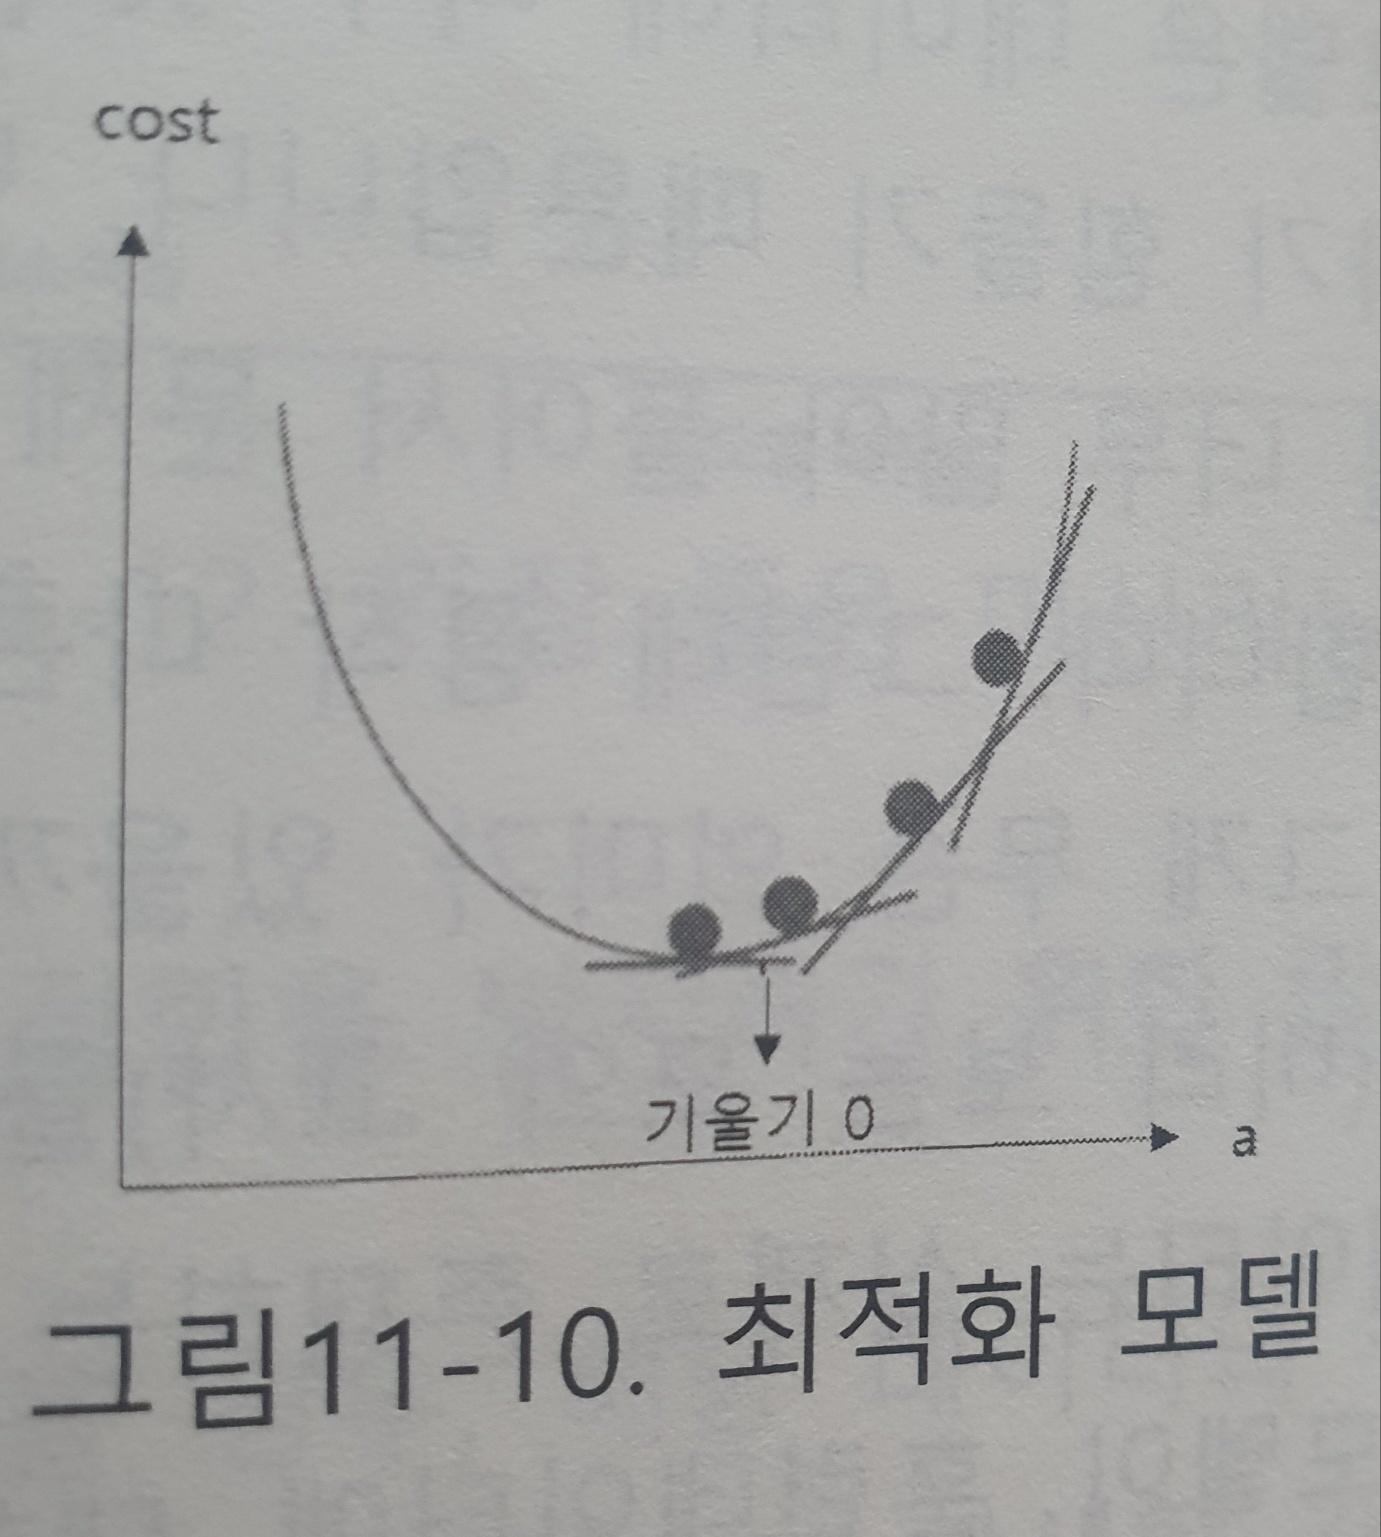

## 머신러닝 모델 일반화
- 회귀식에서 비용함수를 최소화하는데 사용되는 알고리즘을 최적화 알고리즘이라고 했습니다.
<br><br>
- 머신러닝 모델 개발자의 입장에서 머신러닝 모델을 만든다는 것은 이 최적화 결과를 도출하는 것을 의미합니다.
<br><br>
- 과대적합(Overfitting), 과소적합(Underfitting) 모두 머신러닝 모델 개발 시 주의해야 하는 문제입니다.

1. 과대적합
>- 과대적합(Overfitting)은 모델이 훈련 데이터에 너무 잘 맞지만 일반성이 떨어진다는 의미입니다.
<br><br>
>- 과대적합 모델은 데이터에 너무 맞추어져 데이터 이외의 다양한 변수에는 대응하기 힘들기 때문입니다.
<br><br>
>- 훈련데이터는 실제로 존재하는 많은 데이터의 일부에 불과한데 머신러닝 모델이 훈련데이터에 대해서만 과도하게 학습하면 진짜 실전 데이터나 서비스에서 정확도가 좋지 않은 현상이 발생한다는 의미입니다.

2. 과소적합
>- 과소적합은 과대적합의 반대로 모델이 너무 단순해서 데이터의 포함된 의미를 제대로 학습하지 못할 때 발생합니다.

- 머신러닝에서 이 두 가지 과대적합과 과소적합을 조정하는 과정을 학습 또는 훈련이라고 합니다.
<br><br>
- 머신러닝 모델 개발은 주어진 데이터에 대해서 적당하게 조정한다는 의미에서 피팅(fitting)이라고도 합니다.

- 머신러닝 일반화에는 과대적합을 방지하기 위한 많은 방법이 제공합니다.
<br><br>
1. 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 학습 하기 때문에 과대적합 현상이 발생할 가능성이 높아집니다. 따라서 데이터의 양을 늘릴수록 모델은 일반적인 패턴을 학습하여 과대적합을 방지할 수 있습니다. 만약, 데이터의 양이 적은 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다. 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이지를 추가하고, 일부분을 수정하는 등으로 데이터를 증강시킵니다. 빅데이터 시대 영상, 이미지 분야 성능이 좋아지는 것도 이런 이유입니다.
<br><br>
1. 둘째, 모델의 피처(특징) 개수를 줄이는 방법도 있습니다. PCA와 같은 특정 알고리즘을 이용하거나 종속변수와 상관이 낮은 피처를 직접 제거할 수도 있습니다.
<br><br>
1. 세 번째, 일반화, 정규화 또는 가중치 규제(영어로 Regularization)을 통해 제약 조건을 추가하거나 드롭-아웃등의 방법으로 적당한 복잡도를 가지는 모델을 자동적으로 찾는 기법 등이 있습니다.
